# About this Notebook:
- This notebook is being used to produce all the graphs in the paper using the .npys produced into the folder NPYs

In [25]:
import numpy as np
from astropy import constants as c
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
import math as mth
import pandas as pd
import seaborn as sns

In [26]:
# some useful constants in cgs
year = 365.25*24*3600   #in seconds
au = c.au.cgs.value
MS = c.M_sun.cgs.value      #mass of the sun in cgs
ME = c.M_earth.cgs.value    #mass of the earth in cgs
k_b = c.k_B.cgs.value       #boltzmann const
m_p = c.m_p.cgs.value       #mass of proton
Grav = c.G.cgs.value        #gravitational const
au = c.au.cgs.value     

ZS=0.012                    #metallicity of the sun
RS=6957.e10                #Radius of sun in cm

Nr = 1000 # number of grid points      
rhop = 1.25 # internal density of dust grains 
Rout = 1000.*au
    

In [27]:
df=pd.read_csv("with_errors2.csv"
               ,index_col=False)

df2 = df.drop_duplicates(subset=["Planet Name"], keep='first')
col_names=df2.columns.values.tolist()
for i in col_names:
    df2.dropna(subset=[i], inplace=True)

print(len(df2.index))

<ipython-input-27-2da9344cab02>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=[i], inplace=True)


862


In [28]:
MStar_list=df2["mass of star (solar masses)"].values.tolist()        #in terms of solar masses
location_array=df2["semi major axis (au)"].values.tolist()           #in terms of au
Rstar_array=df2["radius of star (solar radius)"].values.tolist()
Metallicity=df2["metallicity = log(k)*metallicity of sun"].values.tolist()           #Making a list of all themetallicity values

In [29]:
print(len(location_array)) # total number of planets

862


In [30]:
I=np.load("NPYs/isolp_full.npy") # percentage of planets that reach their isolation mass
print(I)

[89.21113689 90.9512761  88.97911833 79.46635731 24.82598608]


In [31]:
isol=I
A=[10**-5,10**-4,10**-3,10**-2]                            #alpha values
V=np.linspace(100,1000,10)            #vfrag values
q=10                                #number of planets being considered from the list

In [32]:
AA,VV = np.meshgrid(A,V)

In [33]:
ALPHA=[]
VFRAG=[]
ISOL=[]

for i in range(len(A)):
    for j in range(len(V)):
            ALPHA.append(A[i])
            VFRAG.append(V[j])
            ISOL.append(isol[i][j])


IndexError: invalid index to scalar variable.

In [ ]:
I=np.load("NPYs/isolp_full.npy")
Final=np.load("NPYs/Final_full.npy")
isol=np.load("NPYs/isol_full.npy")
print(isol)
print(I)


[[8. 8. 8. 9. 9. 9. 9. 9. 9. 9.]
 [3. 6. 8. 8. 8. 9. 9. 9. 9. 9.]
 [0. 0. 3. 4. 6. 6. 7. 7. 8. 8.]
 [0. 0. 0. 0. 0. 0. 1. 1. 2. 3.]]
[[80. 80. 80. 90. 90. 90. 90. 90. 90. 90.]
 [30. 60. 80. 80. 80. 90. 90. 90. 90. 90.]
 [ 0.  0. 30. 40. 60. 60. 70. 70. 80. 80.]
 [ 0.  0.  0.  0.  0.  0. 10. 10. 20. 30.]]


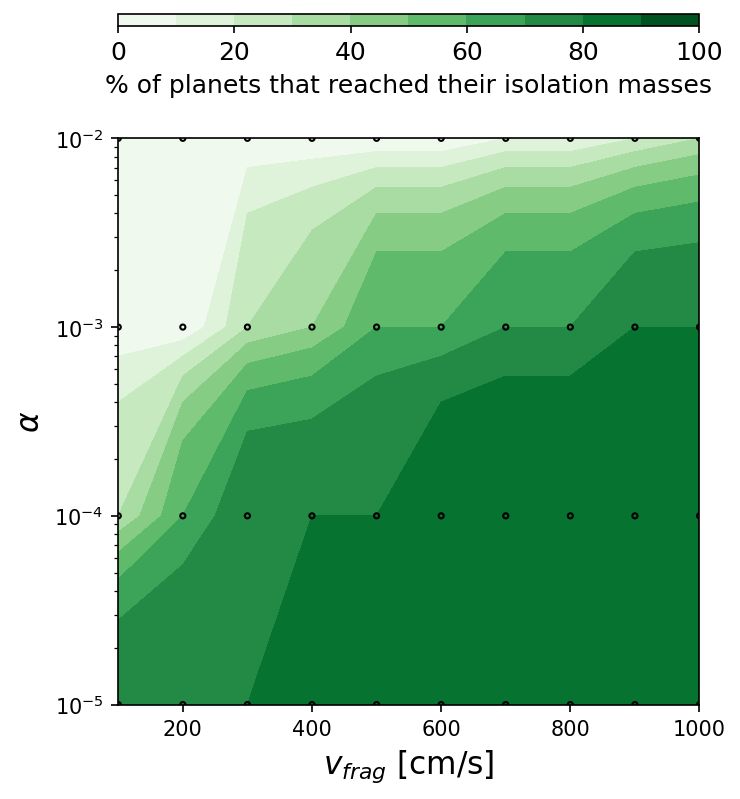

In [ ]:
#COLOUR MAP PRINTING
f,ax = plt.subplots(1,1,figsize=(5,5), dpi=150, sharex=True, sharey=True)
plt.rcParams['font.size'] = '12'

#ax.set_aspect('equal')
ax.set_ylabel(r'$\alpha$', fontsize=15)
ax.set_xlim(100,1000)
ax.set_ylim(10**-5,10**-2)
ax.set_yscale('log')
ax.set_xlabel(r'$v_{frag}$ [cm/s]', fontsize=15)
levelsp = np.arange(0,110,10)

cc = ax.contourf(V,A, I, cmap='Greens',levels=levelsp)

pos = ax.get_position()
cax = f.add_axes([pos.x0,pos.y1+.15,pos.width,pos.width/50])
cb = plt.colorbar(mappable=cc, cax=cax, orientation='horizontal',label='% of planets that reached their isolation masses')
#cp = ax.contour(V,A,isol,levels=levelsp,colors='k')
ax.scatter(VFRAG,ALPHA,s=6,facecolors='none', edgecolors='black')
#ax.scatter(VFRAG,ALPHA,c=isol,s=5)
plt.savefig('main.jpg')

In [ ]:
MStar_list=df2["mass of star (solar masses)"].values.tolist()        #in terms of solar masses
location_array=df2["semi major axis (au)"].values.tolist()           #in terms of au
Rstar_array=df2["radius of star (solar radius)"].values.tolist()
Metallicity=df2["metallicity = log(k)*metallicity of sun"].values.tolist()           #Making a list of all themetallicity values
pl_mass=df2["planet mass (earth mass)"].values.tolist()
pl_rad=df2["planet radius (earth radius)"].values.tolist()
print(len(pl_rad))

862


In [ ]:
year = 365.25*24*3600   #in seconds
Nt = 1000   # how many points on the time grid?
endtime = 1.e7*year
timegrid = np.logspace(np.log10(year),np.log10(endtime),Nt)     #starts from 1 year and ends at endtime defined above, goes for Nt number of points

it2 = timegrid.searchsorted((1) * year)     #time at which the core should start accreting pebble
it2

0

In [ ]:
datax,datay=np.meshgrid(Metallicity, MStar_list,sparse=True)

print(np.shape(datax),np.shape(datay))
data=np.vstack((datax, datay.T))


(1, 862) (862, 1)


In [ ]:
Metallicity_converted=[]
for i in Metallicity:
    Metallicity_converted.append((10**i)*0.012)

print(max(Metallicity_converted))

0.042479680930012156


In [ ]:
K=df2.loc[:,"planet mass (earth mass)"].tolist()
c=0
for i in K:
    if i>140 and i<200:
        c+=1
print(c)


74


In [ ]:
df3=pd.read_csv("with_errors2.csv"
               ,index_col=False)

# Delete duplicate rows based on specific columns 
df4 = df.drop_duplicates(subset=["Planet Name"], keep='first')

MStar_list=df4["mass of star (solar masses)"].values.tolist()        #in terms of solar masses
location_array=df4["semi major axis (au)"].values.tolist()           #in terms of au
Rstar_array=df4["radius of star (solar radius)"].values.tolist()
Metallicity=df4["metallicity = log(k)*metallicity of sun"].values.tolist()           #Making a list of all themetallicity values



In [ ]:
import pandas as pd

df=pd.read_csv("with_errors2.csv"
               ,index_col=False)

# Delete duplicate rows based on specific columns 
df2 = df.drop_duplicates(subset=["Planet Name"], keep='first')
print(len(df2))


935


In [ ]:
df=pd.read_csv("with_errors2.csv"
               ,index_col=False)

# Delete duplicate rows based on specific columns 
df2 = df.drop_duplicates(subset=["Planet Name"], keep='first')

MStar_list=df2["mass of star (solar masses)"].values.tolist()        #in terms of solar masses
location_array=df2["semi major axis (au)"].values.tolist()           #in terms of au
Rstar_array=df2["radius of star (solar radius)"].values.tolist()
Metallicity=df2["metallicity = log(k)*metallicity of sun"].values.tolist()           #Making a list of all themetallicity values

In [ ]:
I

array([[80., 80., 80., 90., 90., 90., 90., 90., 90., 90.],
       [30., 60., 80., 80., 80., 90., 90., 90., 90., 90.],
       [ 0.,  0., 30., 40., 60., 60., 70., 70., 80., 80.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 10., 10., 20., 30.]])

In [ ]:
final=np.load("NPYs/Final_full.npy")
pos=[]
pos2=[]

locations=[]
locerr1=[]
locerr2=[]
massofstar=[]
Metallicityofstar=[]
radiusofstar=[]

locations2=[]
massofstar2=[]
Metallicityofstar2=[]
radiusofstar2=[]

lala=final[0][7]
#print(lala)
for i in range(798):
    if lala[i]==0:
        pos.append(i)
    elif lala[i]==1:
        pos2.append(i)

#print(lala)
for i in pos:
    locations.append(location_array[i])

    massofstar.append(MStar_list[i])
    Metallicityofstar.append(Metallicity[i])
    radiusofstar.append(Rstar_array[i])
    

for i in pos2:
    locations2.append(location_array[i])
    massofstar2.append(MStar_list[i])
    Metallicityofstar2.append(Metallicity[i])
    radiusofstar2.append(Rstar_array[i])

#print(len(pos2))
#print(len(pos))
plt.scatter(locations,massofstar,s=30,color="red",label="Planets that did not reach their isolation mass" , marker='x')
plt.scatter(locations2,massofstar2,s=5,color="green",label="Planets that reached their isolation mass")
#plt.xlim(0,1)
#plt.ylim(0,3)

plt.xlabel("locations of planets (au)")
plt.ylabel(r"Mass of parent stars [$M_\odot$]")
plt.legend(loc=(0,1.15))
plt.title(r"$\alpha = 10^{-5}$ and $v_{frag}$=800cm/s")
plt.xscale("log")



IndexError: index 10 is out of bounds for axis 0 with size 10

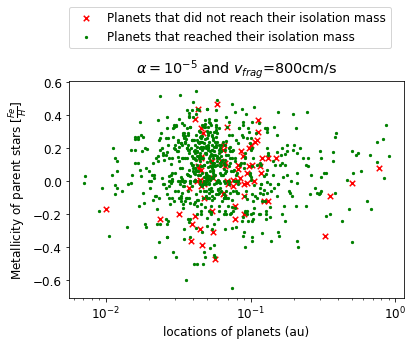

In [ ]:
plt.scatter(locations,Metallicityofstar,s=30,color="red",label="Planets that did not reach their isolation mass", marker='x')
plt.scatter(locations2,Metallicityofstar2,s=5,color="green",label="Planets that reached their isolation mass")
#plt.xlim(0,1)
#plt.ylim(0,3)
plt.xlabel("locations of planets (au)")
plt.ylabel(r"Metallicity of parent stars [$\frac{Fe}{H}$]")
plt.legend(loc=(0,1.15))
plt.title(r"$\alpha = 10^{-5}$ and $v_{frag}$=800cm/s")
plt.xscale("log")

Text(0.5, 1.0, '$\\alpha = 10^{-5}$ and $v_{frag}$=800cm/s')

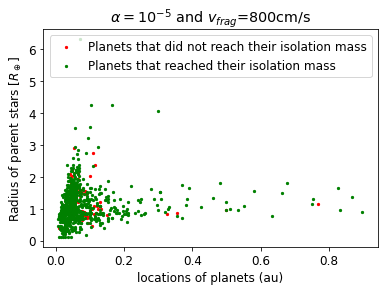

In [ ]:
plt.scatter(locations,radiusofstar,s=5,color="red",label="Planets that did not reach their isolation mass")
plt.scatter(locations2,radiusofstar2,s=5,color="green",label="Planets that reached their isolation mass")
#plt.xlim(0,1)
#plt.ylim(0,3)
plt.xlabel("locations of planets (au)")
plt.ylabel(r"Radius of parent stars [$R_\oplus$]")
plt.legend()
plt.title(r"$\alpha = 10^{-5}$ and $v_{frag}$=800cm/s")

Text(0.5, 1.0, '$\\alpha = 10^{-5}$ and $v_{frag}$=1000cm/s')

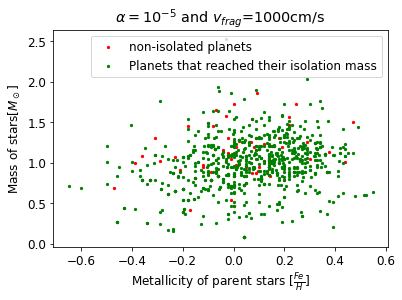

In [ ]:
plt.scatter(Metallicityofstar,massofstar,s=5,color="red",label="non-isolated planets")
plt.scatter(Metallicityofstar2,massofstar2,s=5,color="green",label="Planets that reached their isolation mass")
#plt.xlim(0,1)
#plt.ylim(0,3)
plt.xlabel(r"Metallicity of parent stars [$\frac{Fe}{H}$]")
plt.ylabel(r"Mass of stars[$M_\odot$]")
plt.legend()
plt.title(r"$\alpha = 10^{-5}$ and $v_{frag}$=1000cm/s")

# Now Plotting the metallicity dependent plots: bargraphs

In [ ]:
Metal=np.load("NPYs/Metallicity_full.npy")
isol=np.load("NPYs/isol_full.npy")
Metallicity_normal=[]
for i in range(0,len(Metallicity)):
    Metallicity_normal.append(round(((10**(Metallicity[i]))*ZS),8))
print(Metallicity_normal[0:30])
print(Metal[0][9][0:30])

counts2=0
Z_bins=np.linspace(min(Metallicity_normal),max(Metallicity_normal), 10)
counts2,bins2=np.histogram(Metallicity_normal,bins=Z_bins)
Z_bins
counts2

[0.008113, 0.00922957, 0.02945651, 0.012, 0.01901872, 0.03305074, 0.00774785, 0.01409877, 0.02813075, 0.02625314, 0.01172685, 0.00615434, 0.01816273, 0.00922957, 0.012, 0.00975397, 0.01346422, 0.02495636, 0.01667943, 0.01718625, 0.01750577, 0.00975397, 0.00477729, 0.00629769, 0.02163621, 0.02234505, 0.01442717, 0.01884435, 0.012, 0.01545899]
[0.         0.00922957 0.012      0.01901872 0.03305074 0.00774785
 0.01409877 0.01172685 0.01816273 0.00922957 0.00975397 0.01346422
 0.02495636 0.01718625 0.01750577 0.         0.         0.00629769
 0.         0.02234505 0.01442717 0.01884435 0.01545899 0.02813075
 0.02203846 0.012      0.01346422 0.00942283 0.01236463 0.01119905]


array([ 78, 222, 263, 181, 101,  58,  23,   6,   3], dtype=int64)

(array([ 78., 222., 263., 181., 101.,  58.,  23.,   6.,   3.]),
 array([0.00268647, 0.00710794, 0.01152941, 0.01595087, 0.02037234,
        0.02479381, 0.02921528, 0.03363674, 0.03805821, 0.04247968]),
 <a list of 9 Patch objects>)

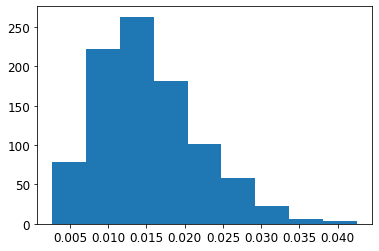

In [ ]:
plt.hist(bins2[:-1],bins2,weights=counts2)

[ 32 166 215 167  86  50  20   6   2]
[0.0048972  0.00931867 0.01374014 0.01816161 0.02258307 0.02700454
 0.03142601 0.03584748 0.04026895]
[ 78 222 263 181 101  58  23   6   3]


Text(0.5, 1.0, '$\\alpha$ = $10^{-4}$; $V_{frag}$=100cm/s')

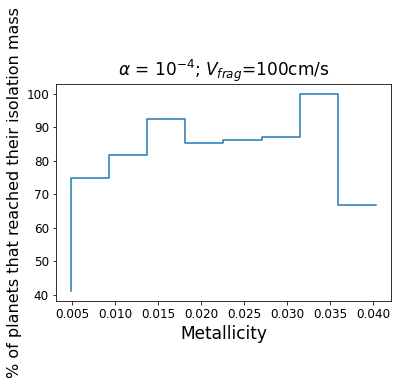

In [ ]:
#X=np.linspace(min(Metallicity,))   
plt.rcParams['font.size'] = '12'

temp=[]
temp=Metal[0][0]
#print(len(temp))
#print(temp)
temp=temp[np.nonzero(temp)]
counts,bins= np.histogram(temp,bins=Z_bins)
#print(counts[0:28]/counts2[0:28])
#binsplot = bins[0:28]
#plt.hist(Z_bins[0:28],Z_bins[0:28],weights=counts[0:28]*100/counts2[0:28])
zcents=0.5*(Z_bins[1:]+Z_bins[:-1])

#Y=np.isfinite(counts*100/counts2)
print((counts))
#plt.semilogx
print((zcents))
print((counts2))
plt.step(zcents,counts*100/counts2)
plt.ylabel("% of planets that reached their isolation mass", fontsize=16)
plt.xlabel("Metallicity", fontsize=17)
#plt.grid()
#plt.ylim(0,130)
plt.title(r"$\alpha$ = $10^{-4}$; $V_{frag}$=100cm/s", fontsize=17)

In [ ]:
temp=Metal[1][3]
#print((temp))
plt.hist(temp,5)
plt.ylabel("Number of isolated planets")
plt.xlabel("Metallicity")
plt.title(r"$\alpha$ = $10^{-4}$; $V_{frag}$=400cm/s")

NameError: name 'Metal' is not defined

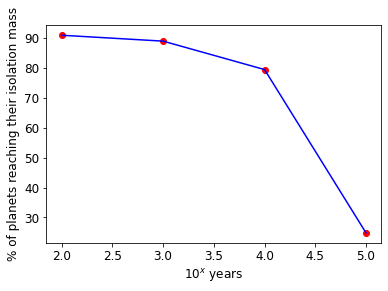

In [55]:
Y = [784., 767., 685., 214.]

for i in range(len(Y)):
    Y[i] = Y[i]/8.62

X = [2, 3, 4, 5]
plt.xlabel(r"10$^x$ years")
plt.ylabel("% of planets reaching their isolation mass")
plt.plot(X, Y, color="blue")
plt.scatter(X,Y, color="red")
